## **PROBLEM** **STATEMENT**

Supply Chain Management (SCM) is the management of the flow of goods and services including all processes that transform raw materials into final products between businesses and locations. This can include the movement and storage of raw materials, work-in-process inventory, finished goods, and end to end order fulfilment from the point of origin to the point of consumption.

There are high chances of us missing out on any of these processes which leads to a huge loss for the company. It is this mistake of handling things that needs to be checked. We need to take the necessary measures to keep at par with the other competing companies in the market.

In a dynamic supply chain environment, problems that arise due to delay in delivery of raw materials and distribution to consumers can pose risk and threats to the company. This study here aims to identify and mitigate the risk so that the same mistake is never repeated in the future that might put the company in trouble.

This is the dataset of Supply Chains used by the company Data Co Global which includes a collection of their products sold, financial details (profit, loss, total sales etc.), shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 1,80,520 customers spanning to 53 columns.

Here we are trying to predict the risk of late delivery by classifying the orders. These classifications are primarily based on the mode of shipment and product type.

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing** **libraries**

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
from geopy.point import Point


plt.rcParams['figure.figsize']= [15,7]
pd.pandas.set_option('display.max_columns',None)
pd.options.display.max_rows=None

## **Loading** **the original data set**

In [153]:
df= pd.read_csv('/content/drive/MyDrive/capstone/DataCoSupplyChainDataset.csv', encoding= 'latin-1')

In [154]:
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.640015,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class


## **Basic data information**

In [155]:
df.shape

(180519, 53)

In the original data set we have 180519 rows and 53 columns.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

From this we have understood the data type of each column, found the columns where null values are present.

Here the columns with null values are Customer Lname, Customer Zipcode, Order Zipcode, Product Description. All the columns are having the appropriate data types.

In [157]:
# Length of numeric columns

len(df.select_dtypes(include=np.number).columns)

29

In [158]:
# Length of categoric columns

len(df.select_dtypes(exclude=np.number).columns)

24

### **Statistical summary of the numeric columns**

In [159]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


The describe() method gives the 5 statistical summary of the numerical columns present in the data set. The summary constitutes of the non-null value count, mean value, standard deviation, minimum value, maximum value, median, 25th quartile and 75th quartile values of the entire column.

## **Missing value analysis**

In [160]:
df.isnull().sum()[df.isnull().sum()>0]*100/ len(df)

Customer Lname           0.004432
Customer Zipcode         0.001662
Order Zipcode           86.239676
Product Description    100.000000
dtype: float64

As Product Description has 100% null values we can drop that column. Also for analysis and model building the categorical columns, ie Customer Lname, Customer Zipcode and Order Zipcode won't be needed and hence they can be dropped as well.

## **Duplicate rows and columns**

In [161]:
# Rows

df[df.duplicated()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


None of the rows are duplicated.

In [162]:
# Columns

duplicateColumnNames = set()

def getDuplicateColumns(df):
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColNames = getDuplicateColumns(df)

for column in duplicateColNames:
    print('Column Name : ', column)

Column Name :  Product Price
Column Name :  Order Customer Id
Column Name :  Order Profit Per Order
Column Name :  Order Item Total
Column Name :  Product Card Id
Column Name :  Customer Password
Column Name :  Product Category Id


The corresponding 7 columns are redundant and hence can be dropped for further analysis.

Order Profit Per Order- Benefits per order

Product Category Id- Category Id

Customer Password- Customer Email

Order Item Total- Sales per customer

Product Card Id- Order Item Product Card Id

Order Customer Id- Customer Id

Product Price- Order Item Product price

## Dropping the redundant columns

In [163]:
df= df.drop(['Order Profit Per Order','Product Category Id','Customer Password','Order Item Total','Product Card Id','Order Customer Id','Product Price','Customer Email',
             'Order Item Cardprod Id'],1)

In [164]:
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Description,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.11,0.04,180517,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,NaN,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,0,2/3/2018 22:56,Standard Class


## Splitting numeric and categorical columns

In [165]:
num= df.select_dtypes(include= np.number).columns
cat= df.select_dtypes(exclude= np.number).columns

### **Dataset imbalance check**

In [166]:
df.Late_delivery_risk.value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

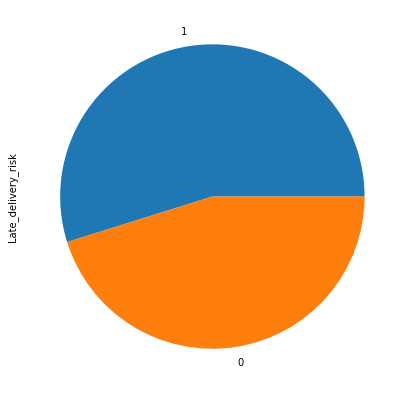

In [167]:
df.Late_delivery_risk.value_counts().plot(kind='pie')


The data set is balanced dataset

## Univariate Analysis

In [168]:
num

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Zipcode', 'Product Description', 'Product Status'],
      dtype='object')

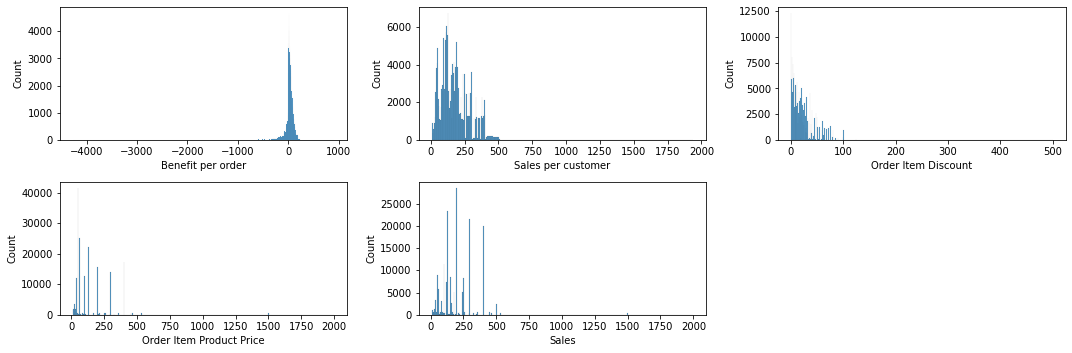

In [169]:
# Numeric continuous variables

iterator=1
for i in [ 'Benefit per order', 'Sales per customer','Order Item Discount','Order Item Product Price', 'Sales']:
    plt.subplot(3,3,iterator)
    sns.histplot(data=df, x=i)
    iterator+=1

plt.tight_layout()
plt.show()

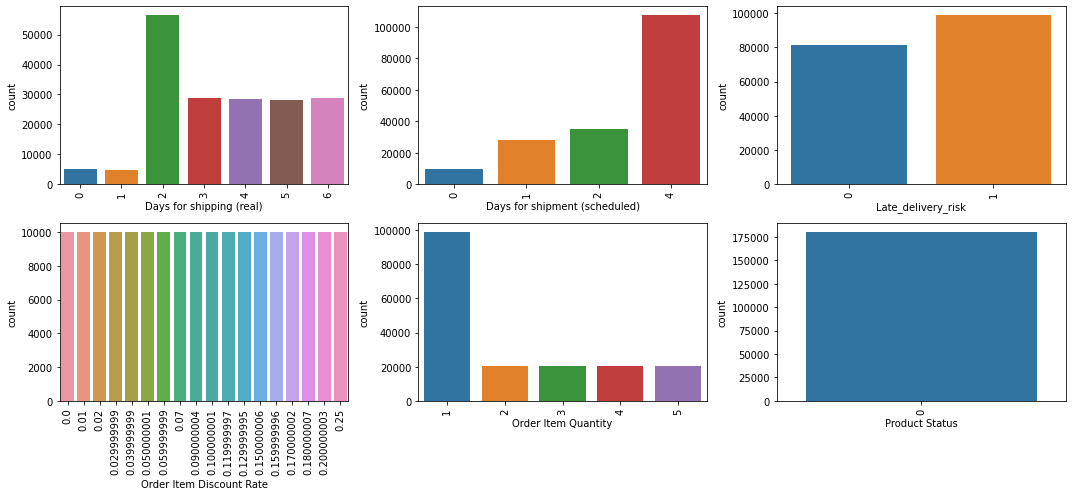

In [170]:
# Numeric discrete variables

col1=['Days for shipping (real)', 'Days for shipment (scheduled)','Late_delivery_risk','Order Item Discount Rate','Order Item Quantity','Product Status']

iterator=1
for i in col1:
    plt.subplot(2,3,iterator)
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    iterator+=1

plt.tight_layout()
plt.show()

In [171]:
cat

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

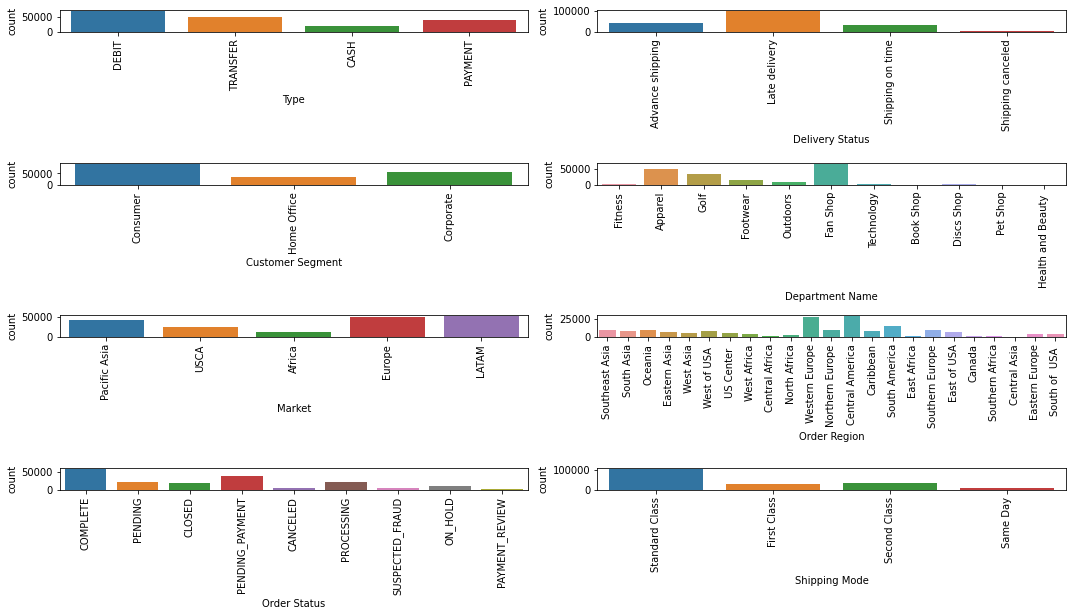

In [172]:
# Categorical variables

iterator=1
for i in ['Type','Delivery Status', 'Customer Segment', 'Department Name', 'Market', 'Order Region','Order Status', 'Shipping Mode']:
    plt.subplot(4,2,iterator)
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    iterator+=1
    plt.tight_layout()
plt.show()

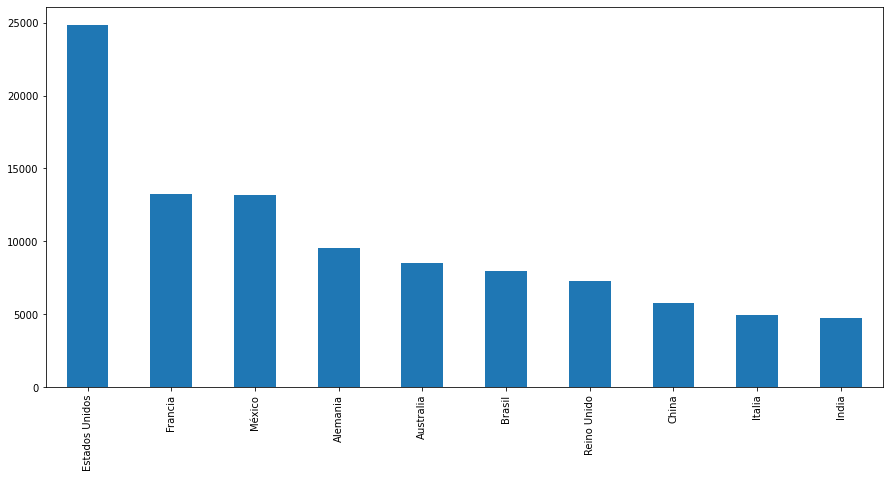

In [173]:
# Number of orders delivered to top 10 countries

df['Order Country'].value_counts()[:10].plot(kind='bar')

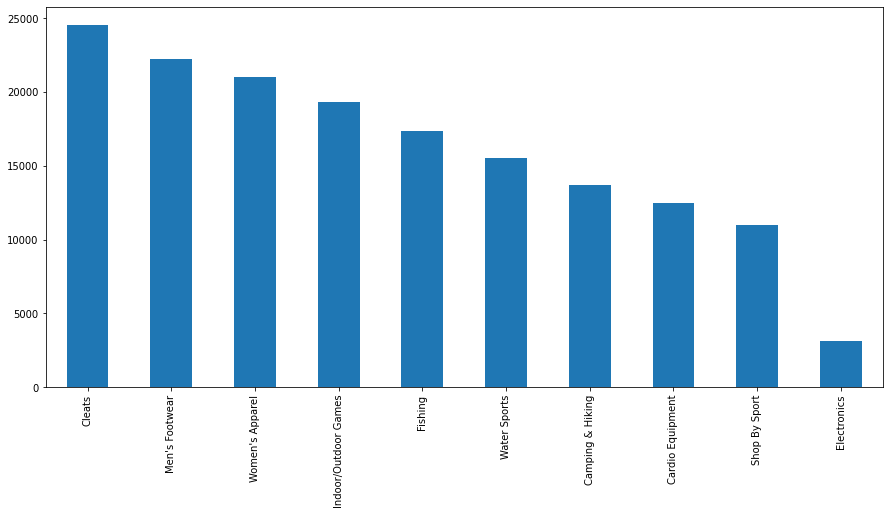

In [174]:
# Demand of items in top 10 categories

df['Category Name'].value_counts()[:10].plot(kind='bar')

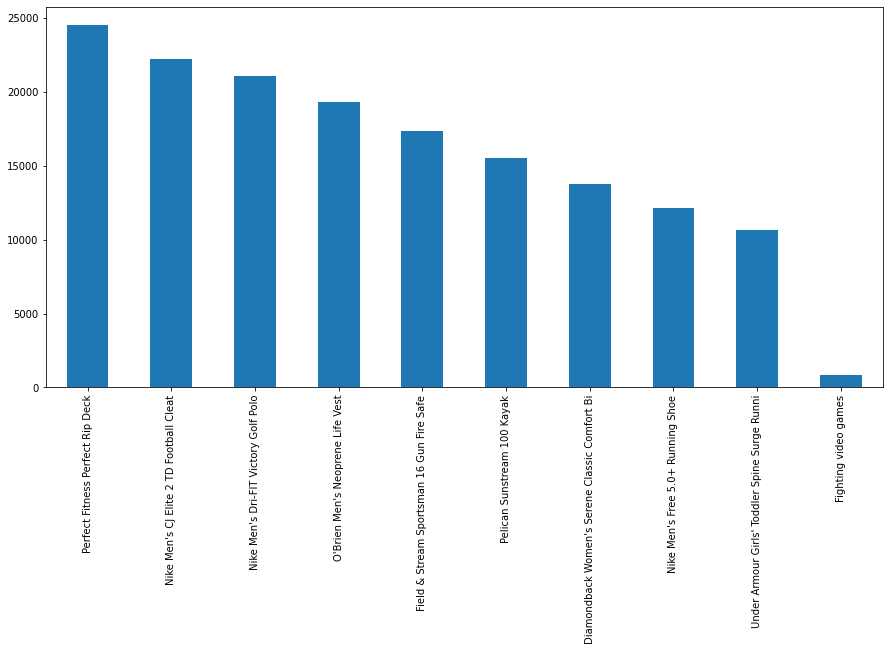

In [175]:
# Top 10 products purchased frequently

df['Product Name'].value_counts()[:10].plot(kind='bar')

The Product Status column has only 0, which means product is available. Hence it is not required for further analysis and hence can be dropped.

In [176]:
# Dropping product status column

df= df.drop('Product Status',1)

## Bivariate Analysis

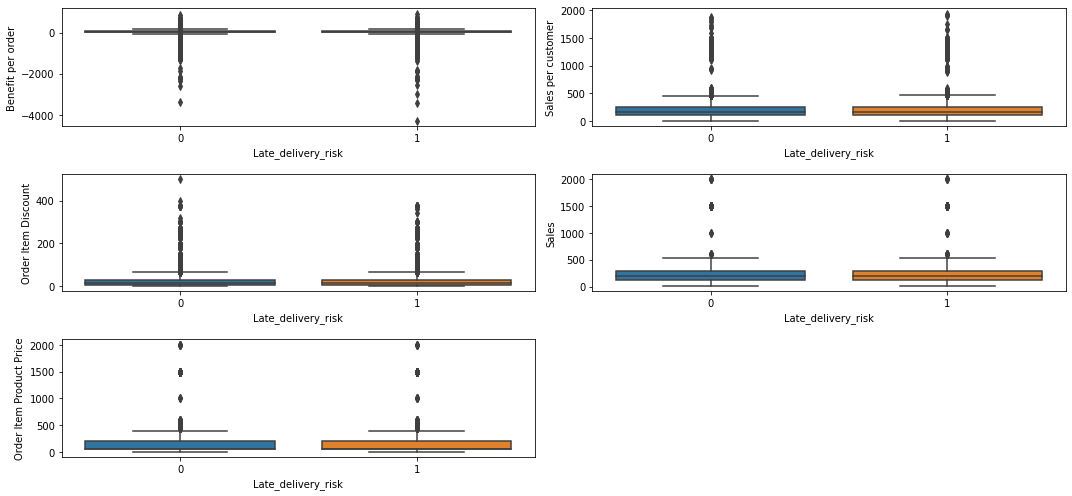

In [177]:
# Numeric continuous columns

iterator=1
for i in [ 'Benefit per order', 'Sales per customer','Order Item Discount', 'Sales', 'Order Item Product Price']:
    plt.subplot(3,2,iterator)
    sns.boxplot(data=df, y=i, x='Late_delivery_risk')
    iterator+=1
    
plt.tight_layout()
plt.show()

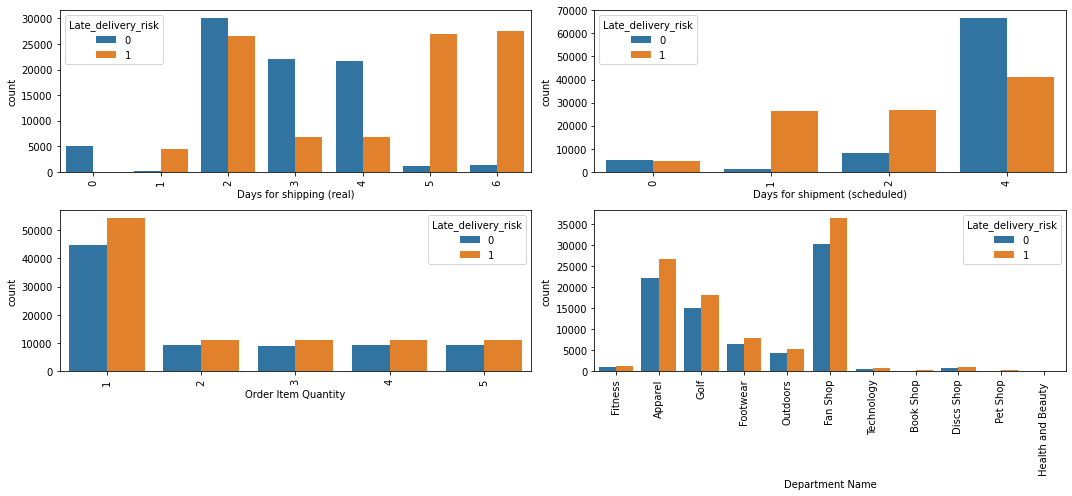

In [178]:
# Numeric discrete columns

iterator=1
for i in ['Days for shipping (real)', 'Days for shipment (scheduled)','Order Item Quantity','Department Name']:
    plt.subplot(2,2,iterator)
    sns.countplot(data=df, x=i, hue='Late_delivery_risk')
    plt.xticks(rotation=90)
    iterator+=1
    
plt.tight_layout()
plt.show()


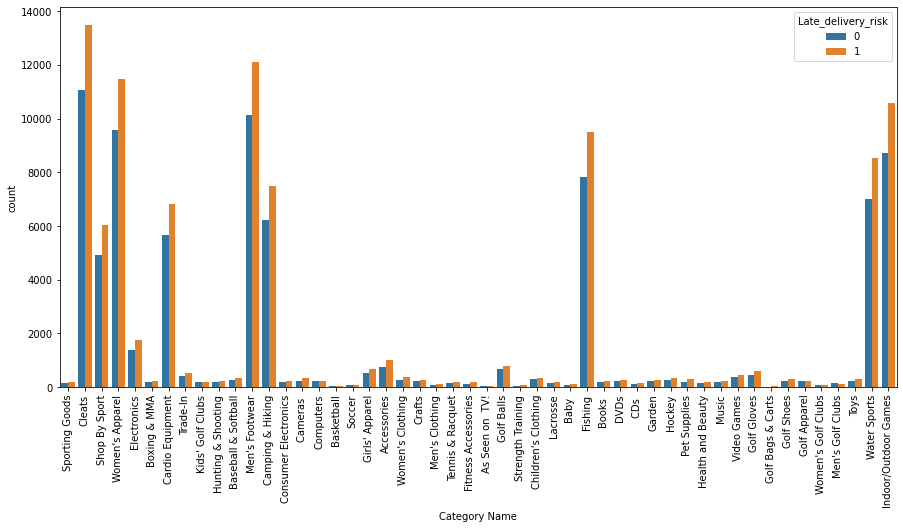

In [179]:
# Category name vs late delivery risk

sns.countplot(data=df, x='Category Name', hue='Late_delivery_risk')
plt.xticks(rotation=90)
plt.show()

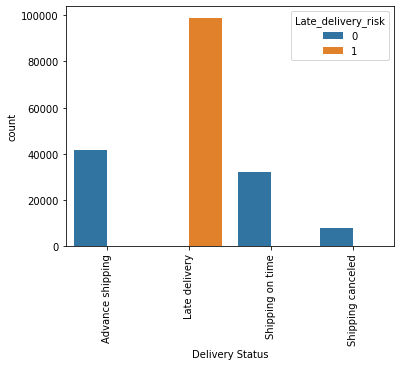

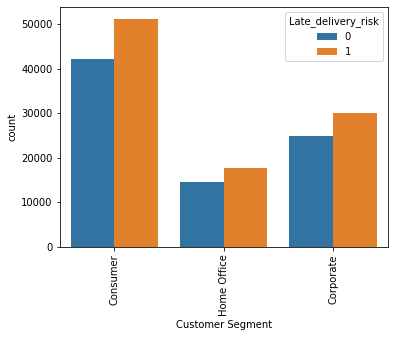

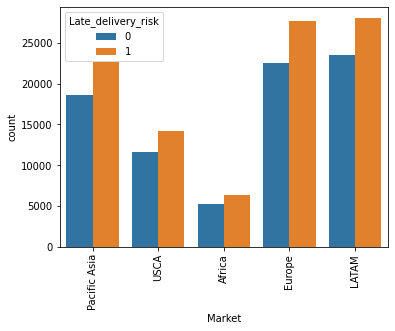

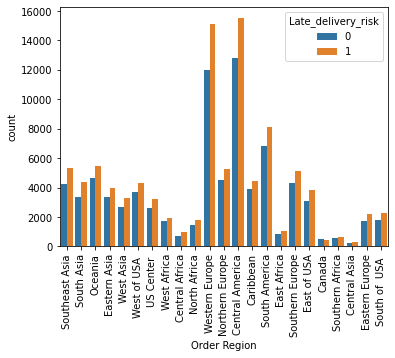

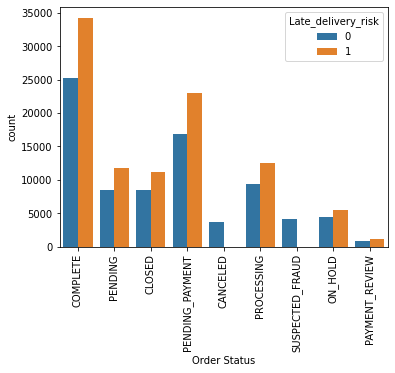

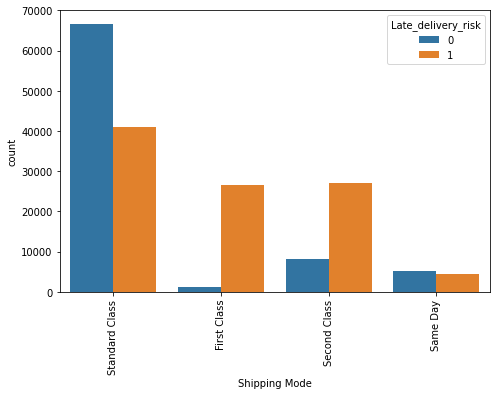

In [180]:
# Categorical variables

iterator=1
for i in ['Delivery Status', 'Customer Segment', 'Market', 'Order Region', 'Order Status', 'Shipping Mode']:
    plt.figure(figsize=(20,15))
    plt.subplot(3,3, iterator)
    sns.countplot(data=df, x=i, hue='Late_delivery_risk')
    plt.xticks(rotation=90)
    iterator+=1
    
plt.tight_layout()
plt.show()

## Correlation and heatmap

The columns containing null values are not required for analysis, also the zipcodes are of no use and hence they have been dropped.

In [181]:
df=df.drop(['Product Description','Product Image','Customer Lname','Customer Zipcode','Order Zipcode'],1)

In [182]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,-0.001631,-0.004073,0.003911,-0.001711,0.002231,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001962
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.000262,-0.005300,0.003675,-0.001878,0.002897,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006327
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.031442,0.000338,-0.002521,0.013716,0.064756,-0.018644,0.013556,0.103459,0.823689,0.015696,0.131816
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,0.232367,-0.000223,0.001444,0.079000,0.498734,-0.119469,0.078176,0.781781,-0.001439,0.105413,0.989744
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.001077,0.000679,-0.001915,-0.001293,-0.000750,0.000404,-0.001376,-0.002175,-0.002316,-0.000139,-0.003564
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.888835,0.002195,-0.002320,0.198496,0.140180,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.227483
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.136897,0.002335,-0.005146,0.204821,0.038490,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060961
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,1.000000,0.002460,-0.002435,0.106757,0.144617,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.234718
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.002460,1.000000,-0.525122,-0.002984,-0.002997,-0.003889,-0.003058,0.000471,-0.000081,-0.001853,-0.000696
Longitude,0.003911,0.003675,-0.002521,0.001444,-0.001915,-0.002320,-0.005146,-0.002435,-0.525122,1.000000,0.002540,0.002343,0.000526,0.002532,-0.000894,-0.003582,0.004467,0.001696


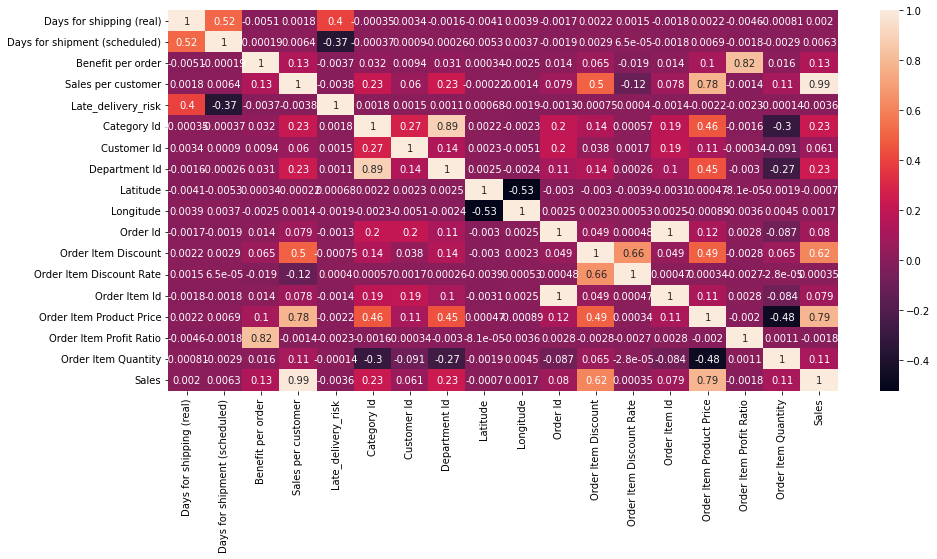

In [183]:
sns.heatmap(df.corr(), annot=True)

## **Statistical Analysis**

In [184]:
# Target variable is taken as categorical.

from scipy import stats

cat=['Type','Delivery Status','Category Name','Customer Segment','Department Name','Market', 'Order City','Order Country','order date (DateOrders)','Order Region',
     'Order State', 'Order Status','Product Name', 'shipping date (DateOrders)', 'Shipping Mode' ]
num=['Days for shipping (real)', 'Days for shipment (scheduled)','Benefit per order', 'Sales per customer','Order Id', 'Order Item Discount',
     'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales']

## Chi Square test

---



In [185]:
# Ho: The predictor is independent of the target variable
# Ha: The predictor is dependent of the target variable
for i in cat:
  tbl= pd.crosstab(df[i], df['Late_delivery_risk'])
  t_stat, pval, dof, exp= stats.chi2_contingency(tbl)
  print('pvalue of',i, pval)

pvalue of Type 5.128672571053333e-239
pvalue of Delivery Status 0.0
pvalue of Category Name 0.7179808169070767
pvalue of Customer Segment 0.5990740516327164
pvalue of Department Name 0.7564916045517328
pvalue of Market 0.07044822520489222
pvalue of Order City 0.0
pvalue of Order Country 4.0108437231692065e-48
pvalue of order date (DateOrders) 0.0
pvalue of Order Region 1.083129807862368e-07
pvalue of Order State 0.0
pvalue of Order Status 0.0
pvalue of Product Name 0.8164060393259804
pvalue of shipping date (DateOrders) 0.0
pvalue of Shipping Mode 0.0


Values greater than 0.05 will tell that the Ho hypothesis is correct.

Columns that are independent of the target variable: Category name, customer segment, Deartment name, Market, Product name

Columns that tell that there is relation between target and predictor: Type, Delivery Status, Order City, Order Country, order date, Order Region, Order state, Order Status, shipping date, Shipping mode.

## Two sample independent t-test

In [186]:
for i in num:
  zero= df.loc[df['Late_delivery_risk']==0,i]
  one= df.loc[df['Late_delivery_risk']==1,i]

  t_stat, pval= stats.ttest_ind(zero, one)
  print('P value for',i, pval)

P value for Days for shipping (real) 0.0
P value for Days for shipment (scheduled) 0.0
P value for Benefit per order 0.11330685383692102
P value for Sales per customer 0.1072215944768319
P value for Order Id 0.5828667507113456
P value for Order Item Discount 0.7500182396319447
P value for Order Item Discount Rate 0.8636143943179868
P value for Order Item Id 0.5588832018589043
P value for Order Item Product Price 0.35537999034926193
P value for Order Item Profit Ratio 0.32521697385298587
P value for Order Item Quantity 0.9528277233341732
P value for Sales 0.12992366469657712


Values greater than 0.05 will tell that the Ho hypothesis is correct.

Columns that are independent of the target variable: Benefits per order, Sales per customer, Order Id, Order item discount, Order item discount rate, Order item id, Order item product price, Order item profit ratio, Order item quantity, Sales

Columns that tell that there is relation between target and predictor: Days for shipping, Days for shipment

## **Base model**

We will drop those variables which are causing multi collinearity and have no significant correlation with the target variable.

In [187]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Id', 'Department Name',
       'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [188]:
data= df.drop(['Delivery Status','Category Name', 'Customer City', 'Customer Country',  'Sales per customer','Customer Fname',  'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Latitude', 'Longitude', 'Department Id', 'Order City', 'Order Country', 'order date (DateOrders)', 
       'Order Item Discount', 'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order State', 'Order Status', 'Product Name',
        'shipping date (DateOrders)'],1)

In [189]:
# Splitting the data


x= data.drop(['Late_delivery_risk'],1)
y= df.Late_delivery_risk

One hot encoding has been used for the categorical variables



## Encoding

In [190]:
x= pd.get_dummies(x, drop_first=True)

### Train test split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.3, random_state=10)

## Logistic regression model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [194]:
lr= LogisticRegression()
lr.fit(xtrain, ytrain)
ypred= lr.predict(xtest)
print(classification_report(ytest, ypred))
print("Training accuracy", lr.score(xtrain, ytrain))
print("Test accuracy", lr.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83     24321
           1       0.84      0.93      0.88     29835

    accuracy                           0.86     54156
   macro avg       0.87      0.85      0.86     54156
weighted avg       0.87      0.86      0.86     54156

Training accuracy 0.8632431961887578
Test accuracy 0.860994165004801


## Feature engineering

Various new features have been created. Based on its correlation with the target variable it will be decied whether to use it for model building or drop it.

In [195]:
# Type of payment

a=['TRANSFER','DEBIT','PAYMENT']
def payment(x):
  if x in a:
    return('Online')
  else:
    return('Offline')

data['payment_mode']=data['Type'].apply(payment)

In [196]:
# Benefit per order- Loss or profit

def benefit(x):
  if x>0:
    return('Profit')
  if x==0:
    return('Break even')
  if x<0:
    return('Loss')

data['Profit_loss']=data['Benefit per order'].apply(benefit)

In [197]:
# Top 10 categories

top10_cat=df['Category Id'].value_counts()[:10].index

def cat10 (x):
  if x in top10_cat:
    return('Top 10')
  else:
    return('Others')

data['Cat_class']=data['Category Id'].apply(cat10)

In [198]:
# finding the day for shipping day, month and year

data['Shipping_month']=pd.to_datetime(df['shipping date (DateOrders)']).dt.month
data['Shipping_year']=pd.to_datetime(df['shipping date (DateOrders)']).dt.year

In [199]:
# Finding the order month, year

data['Order_month']=pd.to_datetime(df['order date (DateOrders)']).dt.month
data['Order_year']=pd.to_datetime(df['order date (DateOrders)']).dt.year

In [200]:
# Count of orders basis customer id

data['Customerwise_order_count']=data.groupby(['Customer Id'])['Order Id'].transform('nunique')

In [201]:
# Count of order item basis market

data['Marketwise_order_count']=data.groupby(['Market'])['Order Id'].transform('nunique')

In [202]:
# Count of order basis shipping mode

data['Shippingmode_order_count']=data.groupby(['Shipping Mode'])['Order Id'].transform('nunique')

In [203]:
# Count of order basis shipping mode and market

data['Mode_market_order_count']=data.groupby(['Shipping Mode', 'Market'])['Order Id'].transform('nunique')

In [204]:
# Count of order basis order month

data['Monthly_order']=data.groupby(['Order_month'])['Order Id'].transform('nunique')


In [205]:
# Count of order basis order year

data['Year_order']=data.groupby(['Order_year'])['Order Id'].transform('nunique')

In [206]:
# Count of order basis shipping month

data['Monthly_shipping']=data.groupby(['Shipping_month'])['Order Id'].transform('nunique')

In [207]:
# Count of order basis shipping year

data['Year_shipping']=data.groupby(['Shipping_year'])['Order Id'].transform('nunique')

In [208]:
data.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Customer Id,Order Id,Order Item Discount Rate,Order Item Product Price,Shipping_month,Shipping_year,Order_month,Order_year,Customerwise_order_count,Marketwise_order_count,Shippingmode_order_count,Mode_market_order_count,Monthly_order,Year_order,Monthly_shipping,Year_shipping
Days for shipping (real),1.000000,0.515880,-0.005101,0.401415,-0.000348,0.003432,-0.001711,0.001467,0.002185,-0.005040,0.005414,-0.007593,0.000842,-0.003424,0.000098,0.432647,0.365324,0.003479,0.000004,-0.002312,-0.005437
Days for shipment (scheduled),0.515880,1.000000,-0.000185,-0.369352,-0.000367,0.000899,-0.001878,0.000065,0.006912,-0.006171,0.003176,-0.007458,0.000656,-0.003177,-0.000450,0.978859,0.828762,0.004956,0.004015,0.003619,0.000205
Benefit per order,-0.005101,-0.000185,1.000000,-0.003727,0.031889,0.009354,0.013716,-0.018644,0.103459,0.009361,0.010567,0.009064,0.010703,-0.008422,0.001602,0.000312,0.000785,-0.002692,0.009424,-0.003169,0.007988
Late_delivery_risk,0.401415,-0.369352,-0.003727,1.000000,0.001752,0.001484,-0.001293,0.000404,-0.002175,0.003688,-0.000448,0.002587,-0.002181,0.002703,0.001825,-0.391541,-0.331060,-0.000592,-0.004150,-0.004026,-0.005162
Category Id,-0.000348,-0.000367,0.031889,0.001752,1.000000,0.274633,0.198496,0.000572,0.461059,0.053605,0.182126,0.062451,0.179645,-0.210644,0.057045,-0.000400,0.026646,0.104662,-0.257233,0.103102,-0.268598
Customer Id,0.003432,0.000899,0.009354,0.001484,0.274633,1.000000,0.204821,0.001712,0.111118,0.040902,0.192829,0.050955,0.189759,-0.223728,0.057187,0.001508,0.029242,0.124521,-0.307404,0.120832,-0.323849
Order Id,-0.001711,-0.001878,0.013716,-0.001293,0.198496,0.204821,1.000000,0.000484,0.115324,0.198402,0.942353,0.206579,0.941952,-0.163784,-0.085112,-0.001320,-0.042313,-0.026822,-0.041485,-0.021096,-0.028773
Order Item Discount Rate,0.001467,0.000065,-0.018644,0.000404,0.000572,0.001712,0.000484,1.000000,0.000345,0.001026,0.000149,0.001107,0.000078,-0.000299,0.000478,-0.000452,0.000567,-0.001213,-0.000767,-0.001624,-0.000599
Order Item Product Price,0.002185,0.006912,0.103459,-0.002175,0.461059,0.111118,0.115324,0.000345,1.000000,0.067144,0.093509,0.070348,0.091843,-0.101006,0.041259,0.006584,0.025017,0.006784,0.011315,0.008778,-0.003772
Shipping_month,-0.005040,-0.006171,0.009361,0.003688,0.053605,0.040902,0.198402,0.001026,0.067144,1.000000,-0.139725,0.952179,-0.124770,-0.052410,-0.104796,-0.004909,-0.055518,-0.288712,0.140107,-0.301679,0.147368


In [209]:
# Dropping all the unnecessary columns created.

data= data.drop(['Benefit per order','Type','Category Id','Shipping_month','Shipping_year','Order_month','Order_year','Customerwise_order_count','Marketwise_order_count',
                 'Monthly_order','Year_order','Monthly_shipping','Year_shipping'],1)

## **Model Building**

In [210]:
data.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Late_delivery_risk', 'Customer Id', 'Market', 'Order Id',
       'Order Item Discount Rate', 'Order Item Product Price', 'Order Region',
       'Shipping Mode', 'payment_mode', 'Profit_loss', 'Cat_class',
       'Shippingmode_order_count', 'Mode_market_order_count'],
      dtype='object')

In [211]:
x1=data.drop(['Late_delivery_risk'],1)
y1=data.Late_delivery_risk

In [212]:
x1=pd.get_dummies(x1, drop_first=True)

## Logistic Regression

In [213]:
xtrain, xtest, ytrain, ytest= train_test_split(x1,y1, test_size=0.3, random_state=10)
lr= LogisticRegression()
lr.fit(xtrain, ytrain)
ypred= lr.predict(xtest)
print(classification_report(ytest, ypred))
print("Training accuracy", lr.score(xtrain, ytrain))
print("Test accuracy", lr.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     24321
           1       0.90      0.99      0.94     29835

    accuracy                           0.93     54156
   macro avg       0.94      0.92      0.93     54156
weighted avg       0.93      0.93      0.93     54156

Training accuracy 0.9309133211462216
Test accuracy 0.9300908486594284


In [214]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=10)
dt.fit(xtrain, ytrain)
pred= dt.predict(xtest)
print(classification_report(ytest, ypred))
print("Training accuracy", dt.score(xtrain, ytrain))
print("Test accuracy", dt.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     24321
           1       0.90      0.99      0.94     29835

    accuracy                           0.93     54156
   macro avg       0.94      0.92      0.93     54156
weighted avg       0.93      0.93      0.93     54156

Training accuracy 1.0
Test accuracy 0.9794297954058645


In [215]:
from sklearn import tree
features= xtrain.columns
dt_file1= open('dt.dot','w')
dot_data= tree.export_graphviz(dt, out_file=dt_file1, feature_names= features, class_names=['0','1'], filled=True, rounded=True)
dt_file1.close()

In [216]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=10)
rf.fit(xtrain, ytrain)
pred= rf.predict(xtest)
print(classification_report(ytest, ypred))
print("Training accuracy", rf.score(xtrain, ytrain))
print("Test accuracy", rf.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     24321
           1       0.90      0.99      0.94     29835

    accuracy                           0.93     54156
   macro avg       0.94      0.92      0.93     54156
weighted avg       0.93      0.93      0.93     54156

Training accuracy 0.999992086291082
Test accuracy 0.9761060639633651


In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(xtrain, ytrain)

ypred= knn.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', knn.score(xtrain, ytrain))
print('Test score:', knn.score(xtest, ytest))    

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     24321
           1       0.78      0.76      0.77     29835

    accuracy                           0.75     54156
   macro avg       0.75      0.75      0.75     54156
weighted avg       0.75      0.75      0.75     54156

Training score: 0.8552107816370298
Test score: 0.7519019129920969


In [218]:
from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier()
ada.fit(xtrain, ytrain)
ypred= ada.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', ada.score(xtrain, ytrain))
print('Test score:', ada.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24321
           1       0.96      1.00      0.98     29835

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.97     54156

Training score: 0.9756811724951133
Test score: 0.9750720141812541


In [219]:
from xgboost import XGBClassifier

xg= XGBClassifier()
xg.fit(xtrain,ytrain)
ypred= xg.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', xg.score(xtrain, ytrain))
print('Test score:', xg.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24321
           1       0.96      1.00      0.98     29835

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.97     54156

Training score: 0.9756811724951133
Test score: 0.9750720141812541


In [220]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
ypred= gb.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', gb.score(xtrain, ytrain))
print('Test score:', gb.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24321
           1       0.96      1.00      0.98     29835

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.97     54156

Training score: 0.9756811724951133
Test score: 0.9750720141812541


In [221]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

bnb= BernoulliNB()
gnb= GaussianNB()
mnb= MultinomialNB()

In [222]:
# Bernoulli

bnb.fit(xtrain, ytrain)
ypred= bnb.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', bnb.score(xtrain, ytrain))
print('Test score:', bnb.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.63      0.88      0.74     24321
           1       0.86      0.58      0.69     29835

    accuracy                           0.72     54156
   macro avg       0.74      0.73      0.71     54156
weighted avg       0.76      0.72      0.71     54156

Training score: 0.7198626180131842
Test score: 0.7164303124307556


In [223]:
# Gaussian

gnb.fit(xtrain, ytrain)
ypred= gnb.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', gnb.score(xtrain, ytrain))
print('Test score:', gnb.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72     24321
           1       0.81      0.64      0.71     29835

    accuracy                           0.72     54156
   macro avg       0.73      0.73      0.72     54156
weighted avg       0.73      0.72      0.72     54156

Training score: 0.7219122686229356
Test score: 0.7165411034788389


In [224]:
# Multinomial

mnb.fit(xtrain, ytrain)
ypred= mnb.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', mnb.score(xtrain, ytrain))
print('Test score:', mnb.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59     24321
           1       0.66      0.60      0.63     29835

    accuracy                           0.61     54156
   macro avg       0.61      0.61      0.61     54156
weighted avg       0.62      0.61      0.61     54156

Training score: 0.6147606498737763
Test score: 0.6124159834552035


### With hyper tuning

In [225]:
from sklearn. model_selection import GridSearchCV
params={'max_depth':[5,4,3], 'criterion':['entropy','gini'],'min_samples_leaf':[2,3,5,7],'min_samples_split':[3,5,7]}

dtree= DecisionTreeClassifier(random_state=10)
dtree_cv=GridSearchCV(dtree, params, cv=5,scoring='precision')
dtree_cv.fit(x,y)
dtree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [226]:
dtt= DecisionTreeClassifier(max_depth=5, criterion='gini',min_samples_leaf=3, min_samples_split=3 , random_state=10)
dtt.fit(xtrain, ytrain)
ypred= dtt.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', dtt.score(xtrain, ytrain))
print('Test score:', dtt.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     24321
           1       0.96      1.00      0.98     29835

    accuracy                           0.98     54156
   macro avg       0.98      0.97      0.97     54156
weighted avg       0.98      0.98      0.98     54156

Training score: 0.9757444821664569
Test score: 0.9750904793559347


In [227]:
from sklearn. model_selection import GridSearchCV
params={'max_features':['sqrt','log2'], 'n_estimators':[20,30,35,40,45,50,60],'max_depth':[2,3,5,6]}

rfh= RandomForestClassifier(random_state=10)
rfh_cv=GridSearchCV(rfh, params, cv=5,scoring='precision')
rfh_cv.fit(x,y)
rfh_cv.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 35}

In [228]:
rft= RandomForestClassifier(max_features='sqrt', n_estimators=35, max_depth=6, oob_score=True, random_state=10)
rft.fit(xtrain, ytrain)
ypred= rft.predict(xtest)
print(classification_report(ytest, ypred))
print('Training score:', rft.score(xtrain, ytrain))
print('Test score:', rft.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     24321
           1       0.91      1.00      0.95     29835

    accuracy                           0.94     54156
   macro avg       0.95      0.94      0.94     54156
weighted avg       0.95      0.94      0.94     54156

Training score: 0.9451026012361213
Test score: 0.9444567545608982
